# Intermediary Quantification of the CD model Bias for each model

This notebook attempts to quantify the amount of bias/offset that is required for each model-CD scaling   to minimize the errors in the residuals.

## Initialize

In [76]:
import plotly.graph_objects as go
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio   ### Allows you to save plotly figs

font_dict=dict(family='Arial',size=14,color='black')
font_annot=dict(family='Arial',size=11,color='black')

plots_dir = "/data/zach_work/Paper2022_assessment/plots/"


In [25]:



run_list = [  'msis2'       ,
              'tiegcm_oc'   ,
              'dtm2020_o'   ,
               'jb2008'    ,
               'hasdm_oc'  ,
               'ctipe_oc',
           ]


run_dict={}
for i in run_list:
    if i =='msis2':
        num = 5
    if i =='tiegcm_oc':
        num = 0
    if i =='dtm2020_o':
        num = 3
    if i =='jb2008':
        num = 1
    if i =='hasdm_oc':
        num = 2
    if i =='ctipe_oc':
        num = 4 
    
    run_dict[i]=num

print(run_dict)
# run_dict = {  #'ctipe_oc' : 4 ,
#               #'msis2'    : 5   ,
#               #'tiegcm_oc': 0  ,
#               #'dtm2020_o'  : 3   ,
#               'jb2008'   : 1   ,
# #               'hasdm_oc' : 2   ,  
#            }


{'msis2': 5, 'tiegcm_oc': 0, 'dtm2020_o': 3, 'jb2008': 1, 'hasdm_oc': 2, 'ctipe_oc': 4}


## Run 

In [26]:
# %load_ext autoreload
# %autoreload 2

# import sys  
# import pickle 
# import gc

# sys.path.insert(0, '/data/geodyn_proj/pygeodyn/pygeodyn_develop/')
# from PYGEODYN import Pygeodyn

# for i,val in enumerate(run_list):   
#     run_settings = '/data/zach_work/Paper2022_assessment/run_settings_adjustCDtoScale/2week_'+val+'.yaml'
#     ### Load the data into an object
#     RunObject = Pygeodyn(run_settings)
#     RunObject.RUN_GEODYN()
#     RunObject = 0
#     gc.collect()
            
# sys.exit()

##  Read

In [27]:
#### Look at the scaled values or fixed values?

data_type = 'adjust'
# data_type = 'fixed'


### Pickle Option

In [28]:
# for i,val in enumerate(run_list): 
#     for ii in ['']:
# EDIT_OBJECT_DATES = 0
%load_ext autoreload
%autoreload 2

import sys  
import pickle 
import gc
import os

sys.path.insert(0, '/data/geodyn_proj/pygeodyn/pygeodyn_develop/')
from PYGEODYN import Pygeodyn

# Obj = {}
dir_save = '/data/data_geodyn/results/icesat2/Paper2022_assessment/ScaleCD_QuantifyBias/'
for i,val in enumerate(run_list):   
    
    pickle_file = dir_save+'2week_CD'+data_type+'_'+val+'.pkl'

    if not os.path.exists(pickle_file):

        print('Must create pickle file...')
        print('   ',  pickle_file)
        print('   ', 'Reading Geodyn Data')


        run_settings = '/data/zach_work/Paper2022_assessment/run_settings_adjustCDtoScale/2week_'+val+'.yaml'
        ### Load the data into an object
        Obj = Pygeodyn(run_settings)
        Obj.getData_BigData_lowmemory()
    #     Obj[val].getData()
        gc.collect()

        #### Pickle the object to save it
        print('   ', 'Saving pickle')
        filehandler = open(pickle_file, 'wb') 
        pickle.dump(Obj, filehandler)
        filehandler.close()
        Obj = 0
        print('   ', 'Saved pickle')


#     else:
#         print(val,i,'  Pickle created -- will load in next step', sep='')
Obj = {}

for i,val in enumerate(run_list):   
    ### Load the data if the pickles exist
    print()
    print()
    gc.collect()
    
    pickle_file = dir_save+'2week_CD'+data_type+'_'+val+'.pkl'
    
    filehandler = open(pickle_file, 'rb') 
    Obj[val] = pickle.load(filehandler)
    filehandler.close()
    print('Loaded data from pickle... ', val)






The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loaded data from pickle...  msis2


Loaded data from pickle...  tiegcm_oc


Loaded data from pickle...  dtm2020_o


Loaded data from pickle...  jb2008


Loaded data from pickle...  hasdm_oc


Loaded data from pickle...  ctipe_oc


### Quick read

In [29]:
# %load_ext autoreload
# %autoreload 2

# import sys  
# import pickle 
# import gc
# import os

# sys.path.insert(0, '/data/geodyn_proj/pygeodyn/pygeodyn_develop/')
# from PYGEODYN import Pygeodyn

# Obj = {}
# dir_save = '/data/data_geodyn/results/icesat2/Paper2022_assessment/ScaleCD_QuantifyBias/'
# for i,val in enumerate(run_list):   
    
#     run_settings = '/data/zach_work/Paper2022_assessment/run_settings_adjustCDtoScale/2week_'+val+'.yaml'
#     ### Load the data into an object
#     Obj[val] = Pygeodyn(run_settings)
#     Obj[val].getData_BigData_lowmemory()


In [30]:
# Obj['msis2'].__dict__['global_params']

### Plot Settings and Features

In [31]:
# plots_dir = '/data/zach_work/validation/ICESat2_3month_Validation/final_plots/'

In [32]:
import plotly.graph_objects as go
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio   ### Allows you to save plotly figs


import pandas as pd
import datetime
import numpy as np

config = dict({
                'displayModeBar': False,
                'responsive': False,
                'staticPlot': True,
                'displaylogo': False,
                'showTips': False,
                })



import numpy as np
import pandas as pd
import os

# px.colors.colorscale_to_colors()
# plotly.colors.PLOTLY_SCALES["Viridis"]

def get_color(colorscale_name, loc):
    from _plotly_utils.basevalidators import ColorscaleValidator
    # first parameter: Name of the property being validated
    # second parameter: a string, doesn't really matter in our use case
    cv = ColorscaleValidator("colorscale", "")
    # colorscale will be a list of lists: [[loc1, "rgb1"], [loc2, "rgb2"], ...] 
    colorscale = cv.validate_coerce(colorscale_name)
    
    if hasattr(loc, "__iter__"):
        return [get_continuous_color(colorscale, x) for x in loc]
    return get_continuous_color(colorscale, loc)
        

# Identical to Adam's answer
import plotly.colors
from PIL import ImageColor
def get_continuous_color(colorscale, intermed):
    """
    Plotly continuous colorscales assign colors to the range [0, 1]. This function computes the intermediate
    color for any value in that range.

    Plotly doesn't make the colorscales directly accessible in a common format.
    Some are ready to use:
    
        colorscale = plotly.colors.PLOTLY_SCALES["Greens"]

    Others are just swatches that need to be constructed into a colorscale:

        viridis_colors, scale = plotly.colors.convert_colors_to_same_type(plotly.colors.sequential.Viridis)
        colorscale = plotly.colors.make_colorscale(viridis_colors, scale=scale)

    :param colorscale: A plotly continuous colorscale defined with RGB string colors.
    :param intermed: value in the range [0, 1]
    :return: color in rgb string format
    :rtype: str
    """
    if len(colorscale) < 1:
        raise ValueError("colorscale must have at least one color")

    hex_to_rgb = lambda c: "rgb" + str(ImageColor.getcolor(c, "RGB"))

    if intermed <= 0 or len(colorscale) == 1:
        c = colorscale[0][1]
        return c if c[0] != "#" else hex_to_rgb(c)
    if intermed >= 1:
        c = colorscale[-1][1]
        return c if c[0] != "#" else hex_to_rgb(c)

    for cutoff, color in colorscale:
        if intermed > cutoff:
            low_cutoff, low_color = cutoff, color
        else:
            high_cutoff, high_color = cutoff, color
            break

    if (low_color[0] == "#") or (high_color[0] == "#"):
        # some color scale names (such as cividis) returns:
        # [[loc1, "hex1"], [loc2, "hex2"], ...]
        low_color = hex_to_rgb(low_color)
        high_color = hex_to_rgb(high_color)

    return plotly.colors.find_intermediate_color(
        lowcolor=low_color,
        highcolor=high_color,
        intermed=((intermed - low_cutoff) / (high_cutoff - low_cutoff)),
        colortype="rgb",
    )




cols = get_color("Viridis", np.linspace(0, 1, 5))
map_cols = np.linspace(0, 1, 5)
colorscale=[]
for i,val in enumerate(map_cols):
    colorscale.append([val, cols[i]])
    



# Simplify Plotting Schemes:
col1 =  px.colors.qualitative.Plotly[2]
col2 =  px.colors.qualitative.Plotly[4]
col3 =  px.colors.qualitative.Plotly[1]
col4 =  px.colors.qualitative.Plotly[3]
col5 =  px.colors.qualitative.Plotly[4]
col6 =  px.colors.qualitative.Plotly[5]



# Simplify Plotting Schemes:
col_msis2     =  "#2ca02c"
col_jb2008    =  "#ff7f0e"
col_dtm2020   =  "#d62728"
col_tiegcm_oc =  "#17becf"
col_hasdm_oc  =  "#1f77b4"
col_ctipe_oc  =  "#9467bd"
# col_msis2 =  px.colors.qualitative.Plotly[2]
# col_jb2008 =  px.colors.qualitative.Plotly[4]
# col_dtm2020 =  px.colors.qualitative.Plotly[1]
# col_tiegcm_oc =  px.colors.qualitative.Plotly[5]
# col_hasdm_oc =  px.colors.qualitative.Plotly[0]
# col_ctipe_oc =  px.colors.qualitative.Plotly[7]

x_annot_val = 1.1



def get_plot_params(plot_num, model_name_string):
    '''
    INPUT:   
        Plot number, model_name string, x_annot_val
    
    RETURN:
        col, x_annot, y_annot1, y_annot2, m_size,   
    '''
    
    

        
    if model_name_string == 'msis2':
        col=col_msis2
    elif model_name_string == 'dtm2020_o':
        col=col_dtm2020
    elif model_name_string == 'jb2008':
        col=col_jb2008
    elif model_name_string == 'tiegcm_oc':
        col=col_tiegcm_oc
    elif model_name_string == 'hasdm_oc':
        col=col_hasdm_oc
    elif model_name_string == 'ctipe_oc':
        col=col_ctipe_oc
        
    ### Old Models
    elif model_name_string == 'dtm87':
        col='grey'
    elif model_name_string == 'jaachia71':
        col='grey'
    elif model_name_string == 'msis86':
        col='grey'
    elif model_name_string == 'msis00':
        col='tan'
        
    return(col)
        

In [33]:
def show_named_plotly_colours():
    """
    function to display to user the colours to match plotly's named
    css colours.

    Reference:
        #https://community.plotly.com/t/plotly-colours-list/11730/3

    Returns:
        plotly dataframe with cell colour to match named colour name

    """
    s='''
        aliceblue, antiquewhite, aqua, aquamarine, azure,
        beige, bisque, black, blanchedalmond, blue,
        blueviolet, brown, burlywood, cadetblue,
        chartreuse, chocolate, coral, cornflowerblue,
        cornsilk, crimson, cyan, darkblue, darkcyan,
        darkgoldenrod, darkgray, darkgrey, darkgreen,
        darkkhaki, darkmagenta, darkolivegreen, darkorange,
        darkorchid, darkred, darksalmon, darkseagreen,
        darkslateblue, darkslategray, darkslategrey,
        darkturquoise, darkviolet, deeppink, deepskyblue,
        dimgray, dimgrey, dodgerblue, firebrick,
        floralwhite, forestgreen, fuchsia, gainsboro,
        ghostwhite, gold, goldenrod, gray, grey, green,
        greenyellow, honeydew, hotpink, indianred, indigo,
        ivory, khaki, lavender, lavenderblush, lawngreen,
        lemonchiffon, lightblue, lightcoral, lightcyan,
        lightgoldenrodyellow, lightgray, lightgrey,
        lightgreen, lightpink, lightsalmon, lightseagreen,
        lightskyblue, lightslategray, lightslategrey,
        lightsteelblue, lightyellow, lime, limegreen,
        linen, magenta, maroon, mediumaquamarine,
        mediumblue, mediumorchid, mediumpurple,
        mediumseagreen, mediumslateblue, mediumspringgreen,
        mediumturquoise, mediumvioletred, midnightblue,
        mintcream, mistyrose, moccasin, navajowhite, navy,
        oldlace, olive, olivedrab, orange, orangered,
        orchid, palegoldenrod, palegreen, paleturquoise,
        palevioletred, papayawhip, peachpuff, peru, pink,
        plum, powderblue, purple, red, rosybrown,
        royalblue, saddlebrown, salmon, sandybrown,
        seagreen, seashell, sienna, silver, skyblue,
        slateblue, slategray, slategrey, snow, springgreen,
        steelblue, tan, teal, thistle, tomato, turquoise,
        violet, wheat, white, whitesmoke, yellow,
        yellowgreen
        '''
    li=s.split(',')
    li=[l.replace('\n','') for l in li]
    li=[l.replace(' ','') for l in li]

    import pandas as pd
    import plotly.graph_objects as go

    df=pd.DataFrame.from_dict({'colour': li})
    fig = go.Figure(data=[go.Table(
      header=dict(
        values=["Plotly Named CSS colours"],
        line_color='black', fill_color='white',
        align='center', font=dict(color='black', size=14)
      ),
      cells=dict(
        values=[df.colour],
        line_color=[df.colour], fill_color=[df.colour],
        align='center', font=dict(color='black', size=11)
      ))
    ])

    fig.show()

# show_named_plotly_colours() 

### Some plotting functions

In [34]:
def orb_avg(den_df, arc):
    
    
    #### Find the index for the correct date
    vals  = np.arange(den_df[arc].index[0],den_df[arc].index[-1]+1)
    df = den_df[arc].set_index('Date',drop=False ) 
    df['i_vals'] = vals
    index_date = df.loc[df.index.max()]['i_vals'].min()
    
#     print('index_date', index_date)
    lat = np.asarray(den_df[arc]['Lat'][:index_date])
    time_pd = pd.to_datetime(den_df[arc]['Date'][:index_date])
    i = np.nonzero( lat[1:]*lat[0:-1]  <  np.logical_and(0 , lat[1:] > lat[0:-1] )  )
    i = i[0]

    d_avg = np.zeros(np.size(i))
    height_avg = np.zeros(np.size(i))
    
#     print('time_pd',time_pd)

    time_avg = []
    d_avg_rolling = []
    
    roll_avg_count = 0
    for j in range(np.size(i)-1):
        d_avg[j]      = np.mean(den_df[arc]['rho (kg/m**3)'  ][i[j] : i[j+1]-1  ]  )
        height_avg[j] = np.mean(den_df[arc]['Height (meters)'][i[j] : i[j+1]-1  ]  )
#         mean_time      = np.mean(time_pd[   i[j] : i[j+1]-1  ])
        t1 = pd.to_datetime(time_pd[ i[j]    ])
        t2 = pd.to_datetime(time_pd[ i[j+1]-1])
        datemiddle = pd.Timestamp(t1) + (pd.Timestamp(t2) - pd.Timestamp(t1)) / 2

        time_avg.append(datemiddle)

        if roll_avg_count ==1:
            d_avg_rolling.append(np.mean([ d_avg[j],  d_avg[j-1]]))
            roll_avg_count =0
            
        roll_avg_count+=1 
    d_avg_rolling.append(np.mean([ d_avg[j],  d_avg[j-1]]))
        
    return(time_avg, d_avg, d_avg_rolling )
    

def plot_density_orbit_avg(fig, obj_m1, plot_num ):
    

    ####  Get plot Parameters for this model
    model_m1 = obj_m1.__dict__['global_params']['den_model']
    col,x_annot,y_annot1,y_annot2,m_size = get_plot_params(plot_num, model_m1)
    
    for ii,arc in enumerate(obj_m1.__dict__['global_params']['arc_input']):
        
        vals  = np.arange(obj_m1.__dict__['Density'][arc].index[0],obj_m1.__dict__['Density'][arc].index[-1]+1)
        df = obj_m1.__dict__['Density'][arc].set_index('Date',drop=False ) 
        df['i_vals'] = vals
        index_date = df.loc[df.index.max()]['i_vals'].min()

        
        time_avg,d_avg, d_avg_rolling = orb_avg(obj_m1.Density, arc)
        
        
        fig.add_trace(go.Scattergl(x=time_avg,
                                 y=d_avg_rolling,
#                                  y=d_avg,
                                name= model_m1 ,
                                mode='markers',
                                marker=dict(
                                color=col,
                                size=7,),
                                showlegend=False,
                                   ),
                                   row=1, col=1,
                                   )
        

        fig.update_yaxes(type="log", exponentformat= 'power',row=1, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_yaxes(title_text="kg/m^3", row=1, col=1)
#     fig.update_yaxes(title_text="nT", row=2, col=1)
#     fig.update_yaxes(title_text="sfu", row=3, col=1)
    fig.update_layout(legend= {'itemsizing': 'constant'})
#     fig.update_layout(
#         font=dict(          size=18, ),
#         autosize=False,
#         width=900,
#         height=1000,)
    
    return(fig)



def Plot_Densitycomparison(fig, obj_m1, plot_num):


    ####  Get plot Parameters for this model
    model_m1 = obj_m1.__dict__['global_params']['den_model']
    col,x_annot,y_annot1,y_annot2,m_size = get_plot_params(plot_num, model_m1)
    
    
    for ii,arc in enumerate(obj_m1.__dict__['global_params']['arc_input'][:]):
        
        
        #### INDEX THE DENSITY DF correctly
        vals  = np.arange(obj_m1.__dict__['Density'][arc].index[0],obj_m1.__dict__['Density'][arc].index[-1]+1)
        df = obj_m1.__dict__['Density'][arc].set_index('Date',drop=False ) 
        df['i_vals'] = vals
        index_date = df.loc[df.index.max()]['i_vals'].min()

        
        str_run_param = 'run_parameters'+ arc
        final_iter = obj_m1.__dict__[str_run_param]['str_iteration']
        i_arc = ii+1
        
        
        
        vals  = np.arange(obj_m1.__dict__['Density'][arc].index[0],obj_m1.__dict__['Density'][arc].index[-1]+1)
        df = obj_m1.__dict__['Density'][arc].set_index('Date',drop=False ) 
        df['i_vals'] = vals
        index_date = df.loc[df.index.max()]['i_vals'].min()       
        time_avg,d_avg, d_avg_rolling = orb_avg(obj_m1.Density, arc)
        
        
        
        print('----',model_m1,'----')
        print('     mean:    ',np.mean(obj_m1.Density[arc]['rho (kg/m**3)']),'----')
        print('     variance:',np.std(obj_m1.Density[arc]['rho (kg/m**3)']),'----')
        print()
#         if ii ==0:
#             fig.add_trace(go.Scattergl(  x=obj_m1.Density[arc]['Date'][:index_date][:],
#                                      y=obj_m1.Density[arc]['rho (kg/m**3)'][:index_date][:],
#                                      name= model_m1,
#                                      mode='markers',
#                                      opacity=1,
#                                      marker=dict(
#                                         color=col, 
#                                         size=m_size,),
#                                      showlegend=True,),
#                                       secondary_y=False,
#                                        row=1, col=1,)

#         else:
#             fig.add_trace(go.Scattergl(  x=obj_m1.Density[arc]['Date'][:index_date][:],
#                          y=obj_m1.Density[arc]['rho (kg/m**3)'][:index_date][:],
#                          name= model_m1,
#                          mode='markers',
#                          opacity=1,
#                          marker=dict(
#                             color=col, 
#                             size=m_size,),
#                          showlegend=False,),
#                           secondary_y=False,
#                            row=1, col=1,)
        fig.add_trace(go.Scattergl(x=time_avg,
                     y=d_avg_rolling,
                    name= model_m1 ,
                    mode='markers',
                    marker=dict(
                    color='black',
                    size=5,),
                    showlegend=False,),
                       row=1, col=1,)


#         (mean,rms,rms_about_zero) = STATS_residuals(data_resids['T'], 'in-track')

#         fig = add_stats_annotation(fig, model_m1+'<br>Mean='+ str(np.round(mean,4))+'<br>RMS='+ str(np.round(rms_about_zero,4)), col , x_annot, y_annot1)


    fig.update_yaxes( title=r"$\frac{kg}{m^3}$", type='log', exponentformat= 'power',row=1, col=1)
    fig.update_xaxes( title="Date", row=1, col=1)

    return(fig)


def legend_as_annotation(fig, den_model_string, color_it, x_annot, y_annot):
    fig.add_annotation(
            x=x_annot,
            y=y_annot,
            xref="paper",
            yref="paper",
            showarrow=False,
            text=den_model_string,
            font=dict(
                size=16,
                color="#ffffff"
                ),
            align="center",
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor=color_it,
            opacity=0.9
            )

    return(fig)

def add_stats_annotation(fig, text_in, col, x_annot, y_annot):
    fig.add_annotation(
            x=x_annot,
            y=y_annot,
            xref="x domain",
            yref="y domain",
            showarrow=False,
            text=text_in,
            font=dict(
                size=13,
                color="#ffffff"
                ),
            align="center",
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor=col,
            opacity=0.9
            )
    return(fig)

import pandas as pd

def STATS_residuals(residuals,measurement_type):
    import numpy as np
    n = np.size(residuals)
    mean = (1/n)*(np.sum(residuals))
    variance = (1/n)*(np.sum(np.square(residuals)))
    rms = np.sqrt(variance)
    rms_about_zero = np.sqrt((n/(n-1))*variance)
    
                
#     print('mean            ',measurement_type ,':',mean)
#     print('rms             ',measurement_type ,':',rms)
#     print('rms about zero  ',measurement_type ,':',rms_about_zero)
#     print()
    
    return(mean,rms,rms_about_zero)






In [35]:
from netCDF4 import Dataset
def read_nc_file( filename, variables):
    ''' This function reads the TIEGCM .nc files and saves the given input variables to a dictionary.
        The breakloop feature is here so that if the file doesn't exist the code can still continue.  '''
    status = os.path.exists(filename)
    
    if status == True:
        data = {}
        for i, var_names in enumerate(variables):
            ncid =  Dataset(filename,"r+", format="NETCDF4")# filename must be a string
            varData = ncid.variables
            data[var_names] = np.array(varData[var_names])  
    elif status == False:
        print('No File Found', filename )
        breakloop = True
        data = 0
        return( data , breakloop)
    breakloop = False
    return(data,breakloop )


arc_list = []

arc_list_18 = np.arange(292,366)
for i in arc_list_18:
    val = '2018'+str(i)
    arc_list.append(int(val))
    
    #     print(val)
    
arc_list_19 = np.arange(1,10)
for i in arc_list_19:
    val = '201900'+str(i)
    arc_list.append(int(val))


path_to_f107 = '/data/data_geodyn/gpi_1960001-2021243_f107aDaily.nc'
variables = ['year_day', 'f107d', 'f107a', 'kp']
f107_data = read_nc_file(path_to_f107, variables)

date = []
kp_list = []
f107d_list = []
f107a_list  = []
date_3hr = []


for i,val in enumerate(arc_list):
    
    index = f107_data[0]['year_day']==val
    kp_list.append(f107_data[0]['kp'][index][0])
    f107d_list.append(f107_data[0]['f107d'][index][0])
    f107a_list.append(f107_data[0]['f107a'][index][0])
    
    date.append(pd.to_datetime( str(val), format='%Y%j'))

    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=0))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=3))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=6))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=9))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=12))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=15))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=18))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=21))
#     date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=24))
    
kp_expand = []
for i in kp_list:
    for ii in i:
        kp_expand.append(ii)
        
        
        
solar_fluxes = {}
solar_fluxes['f107d_list'] = f107d_list
solar_fluxes['f107a_list'] = f107a_list
solar_fluxes['date']       = date
solar_fluxes['date_3hr']   = date_3hr
solar_fluxes['kp_expand']  = kp_expand


### Prepare RMS total Plot arrays

arc_listlist=[  ['2018.292', '2018.293', '2018.294', '2018.295', '2018.296', 
                 '2018.297', '2018.298', '2018.299' ],                  
                #
                ['2018.304', '2018.305', '2018.306', '2018.307', '2018.308' ],  
                #
                ['2018.313', '2018.314', '2018.315', '2018.316', '2018.317',
                 '2018.318', '2018.319', '2018.320', '2018.321', '2018.322',
                 '2018.323', '2018.324', '2018.325', '2018.326', '2018.327' ],  
                #
                ['2018.335', '2018.336', '2018.337' ],  
                #
                ['2018.349', '2018.350', '2018.351', '2018.352' ],  
                #
                ['2018.356', '2018.357', '2018.358' ],  
                #
                ['2018.365', '2019.001', '2019.002', '2019.003', '2019.004', 
                 '2019.005', '2019.006', '2019.007', '2019.008',
                '2019.009'],  
                ]


## Plot Cd Adjustment

In [36]:
val

2019009

In [77]:
satid = int(Obj['hasdm_oc'].__dict__['global_params']['SATID'])




fig = make_subplots(rows=1, cols=1,
#                     subplot_titles=([ ' ', ]),
                    #                     
                    specs=[[ {"secondary_y": False} ]],
                    #
                    vertical_spacing = 0.05,
                    shared_xaxes=True)

for plot_num, model in enumerate(run_list):
    col = get_plot_params(plot_num, model)
    plot
    Cd_vals  = []
    Cd_times = []
    for iarc,valarc in enumerate(Obj[model].__dict__['global_params']['arc_input']):
        arc = valarc+'.01'
        iters = int(Obj[model].__dict__['run_parameters'+arc]['total_iterations'])

        for itime in Obj[model].__dict__['AdjustedParams'][arc][iters][satid]['0CD'].keys():
    #         print( Obj['msis2'].__dict__['AdjustedParams'][arc][iters][satid]['0CD'][itime]['CURRENT_VALUE'])
            Cd_vals.append(Obj[model].__dict__['AdjustedParams'][arc][iters][satid]['0CD'][itime]['CURRENT_VALUE'])
            Cd_times.append(itime)
    Cd_mean = np.mean(Cd_vals)
    print('MEAN CD FOR ',model, '-- Cd_mean=',Cd_mean,sep='')
    
    
    fig.add_hline(y=Cd_mean, line = dict(dash='dash', color = col, width=2),
                    )
    
    
    
    if model == 'msis2':
        modelname = "MSISe2"
        shift = -0.31
    elif model == 'dtm2020_o':
        modelname = "DTM2020"
        shift=.1
    elif model == 'jb2008':
        modelname = "JB2008"
        shift = .12
    elif model == 'tiegcm_oc':
        modelname = "TIEGCM"
        shift = 0.1
    elif model == 'hasdm_oc':
        modelname = "HASDM"
        shift = 0.5
    elif model == 'ctipe_oc':
        modelname = "CTIPe"
        shift = 0

    else:
        shift=0
        
    fig.add_annotation(
                y= Cd_mean+shift,
#                 x= 1.158,
                x= 1.1,
                xref="x domain", yref="y",
                showarrow=False,
                text=modelname+"<br>Mean CD="+str(np.round(Cd_mean,2)), 
                align = 'left',
                bgcolor='white',
                bordercolor=col,
                borderwidth=1.2,
                borderpad=1.2,
                font=font_annot,
                )
    
    fig.add_trace(go.Scattergl(x=Cd_times,
                               y=Cd_vals,
                               name= model,
                               mode='markers',
                               opacity=0.8,
                                   marker=dict(color=col, size=10 ),
    #                            line = dict(shape = 'hvh', color = 'cornflowerblue', width=1.5),
                               showlegend=False),
                               secondary_y=False,row=1, col=1)
    

fig.add_hline(y=1.2367916759507616, line = dict(dash='dash', color = col_msis2, width=2))


fig.update_xaxes(### LINE at axis border
                  showline=True,
                  showticklabels=True,
                  linecolor='black',
                  linewidth=1,
                 ### Major ticks
                  ticks='inside',
                  tickfont=font_dict,
                  mirror=True,
                  tickwidth=2,
                  ticklen=9,
                  tickcolor='grey',
                  tick0="2018-11-9" ,
                  dtick=86400000.0*2,    # milliseconds in a day, every 7 days
                  #### Minor Ticks
                   minor=dict(
                     dtick=86400000.0, # milliseconds in a day
                     tickwidth=1,
                     ticklen=4,
                     tickcolor='grey',
                     ticks='inside'),
                  ### GRID
                   gridcolor='gainsboro',
                   gridwidth=1,
                   layer='above traces',
                   tickangle=0,
                   row=1, col=1)
fig.update_yaxes(showline=True,      # add line at x=0
                     showticklabels=True,
                     linecolor='black',  # line color
                     linewidth=1,        # line size
                 ticks='inside',     # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror='allticks',  # add ticks to top/right axes
                 tickwidth=1,      # tick width
                 tickcolor='black',  # tick color
                 gridcolor='gainsboro',
                 gridwidth=1,
                 layer='above traces',
#                  range=[1,5],
                 row=1, col=1)

        ###
fig.update_yaxes( title=r"$\text{Adjusted CDs}$" ,type="linear" , exponentformat= 'power',
#                           range=yaxis4_range, 
                 row=1, col=1)
###
###  DATE on Final x-Axis only
fig.update_xaxes(title=r"$\text{Date}$", 
                 range=[pd.to_datetime( "181108-160000", format='%y%m%d-%H%M%S'),
                        pd.to_datetime( "181125-120000", format='%y%m%d-%H%M%S')],
                 row=1, col=1)
# modelnames=[]
# modelcolors = []
# #### LEGEND ####
# for model in run_dict.keys():
#     if model == 'msis2':
#         modelnames.append("MSISe2")
#         modelcolors.append(col_msis2)

#     elif model == 'dtm2020':
#         modelnames.append("DTM2020")
#         modelcolors.append(col_dtm2020)

#     elif model == 'jb2008':
#         modelnames.append("JB2008")
#         modelcolors.append(col_jb2008)

#     elif model == 'tiegcm_oc':
#         modelnames.append("TIEGCM")
#         modelcolors.append(col_tiegcm_oc)

#     elif model == 'hasdm_oc':
#         modelnames.append("HASDM")
#         modelcolors.append(col_hasdm_oc)

#     elif model == 'ctipe_oc':
#         modelnames.append("CTIPe")
#         modelcolors.append(col_ctipe_oc)



# df = pd.DataFrame({"starts_colors": modelcolors
#                                     })

# fig.update_traces(showlegend=False).add_traces(
#     [   go.Scattergl(name=modelnames[i], 
#                x=[pd.to_datetime( "181109-000000", format='%y%m%d-%H%M%S')],
#                mode='lines',
#                line = dict(shape = 'hv',  width=10),
#                marker_color=c, 
#                showlegend=True)
#         for i,c in enumerate((df.loc[:,["starts_colors"]].values.ravel()))])

# fig.update_layout(legend=dict(
#     yanchor="middle",
#     y=0.5,
#     xanchor="center",
#     x=1.2,
# #     x=1.015,
#         font=font_dict      ,
#         bgcolor="white",
#         bordercolor="darkgrey",
#         borderwidth=0.8,
#     )  )


fig.update_layout(
#                   title = '',
                  autosize=False,    width=800,    height=500,
                  legend= {'itemsizing': 'trace'},
                  font=font_dict,
                  plot_bgcolor='white', 
                 )
fig.update_annotations(font_size=14)  # Increase size of subplot title

fig.show( config=config )

pio.write_image(fig, plots_dir+'AdjustCD_toScale_CDmeans.jpg', scale=3)


MEAN CD FOR msis2-- Cd_mean=1.2367916759507616
MEAN CD FOR tiegcm_oc-- Cd_mean=1.3729493124180414
MEAN CD FOR dtm2020_o-- Cd_mean=3.351462031922206
MEAN CD FOR jb2008-- Cd_mean=1.908777734422605
MEAN CD FOR hasdm_oc-- Cd_mean=2.076144230698155
MEAN CD FOR ctipe_oc-- Cd_mean=4.368334120294092


In [15]:
Cd_vals

[4.055422865774214,
 4.801178170443011,
 4.408560783920278,
 4.130545463182877,
 4.295386105778497,
 4.086693442971342,
 4.161859919029518,
 4.285513394981066,
 4.248686792780874,
 4.315651957083175,
 4.30060360018131,
 4.707906459087739,
 4.730592010664627,
 4.547882814112686,
 4.448528024420171]

# Plot Two Weeks  

## Model Validation Metrics


In [16]:
%load_ext autoreload
%autoreload 2



yaxis1_range = [-0.23888888888888893, 4.538888888888889] #full_fig.layout.yaxis1.range
yaxis2_range = [-13.7,  -12.6]# -12.882954062508686] #full_fig.layout.yaxis2.range
yaxis3_range = [-100, 60] #full_fig.layout.yaxis3.range
yaxis4_range = [-2, 43] #full_fig.layout.yaxis4.range

def plot_all_nokp(fig, obj_m1, plot_num, solar_fluxes,    arc_listlist ):
    

    ####  Get plot Parameters for this model
    model_m1 = obj_m1.__dict__['global_params']['den_model']
    col = get_plot_params(plot_num, model_m1)
    
    #### -----------------------------------------------------------------------------------------------------
    #### Solar Flux Plot
    
#     index1 = 21+1
#     index2 = 37+1
#     index3h_1 = 168+8
#     index3h_2 = 289+8
    
#     if plot_num == 2 or plot_num == 0:
#         index1 = 21
#         index2 = 37
#         index3h_1 = 168
#         index3h_2 = 289

#         fig.add_trace(go.Scatter(x=solar_fluxes['date'][index1:index2],
#                                    y=solar_fluxes['f107d_list'][index1:index2],
#                                    name= 'F107d',
#                                    mode='lines',
#                                    opacity=0.8,
#     #                                marker=dict(color='cornflowerblue', size=2 ),
#                                    line = dict(shape = 'hvh', color = 'cornflowerblue', width=1.5),
#                                    showlegend=False),
#                                    secondary_y=True,row=1, col=1)

#         fig.add_trace(go.Scatter(x=solar_fluxes['date_3hr'][index3h_1:index3h_2],
#                                    y=solar_fluxes['kp_expand'][index3h_1:index3h_2],
#                                    name= 'Kp',
#                                    mode='lines',
#                                    opacity=1,
#     #                                marker=dict(color='black',size=2),
#                                    line = dict(shape = 'hvh', color = 'black', width=2),
#                                    showlegend=False),
#                                    secondary_y=False,row=1, col=1) 
        
#         fig.add_vrect(x0=pd.to_datetime( str(2018312), format='%Y%j'),
#                       x1=pd.to_datetime( str(2018313), format='%Y%j'),
#                       fillcolor='gainsboro',
#                       opacity=.6,
#                       layer="below",
#                       line_width=0,
#                      row=1,col=1)
#         fig.add_vrect(x0=pd.to_datetime( str(2018328), format='%Y%j'),
#                       x1=pd.to_datetime( str(2018338), format='%Y%j'),
#                       fillcolor='gainsboro',
#                       opacity=.6,
#                       layer="below",
#                       line_width=0,
#                      row=1,col=1)


#### Arc Background 

    for i1,arc1 in enumerate(arc_listlist):#obj_m1.__dict__['global_params']['arc_input']):
        dateplot = []
        rms_totals = []
        
        for ii,arc in enumerate(arc1):#obj_m1.__dict__['global_params']['arc_input']):
            if arc not in obj_m1.__dict__['global_params']['arc_input']:
                continue
            else:
                arc =arc+'.01'

                dateplot.append(pd.to_datetime(datetime.datetime(int(arc.split('.')[0]), 1, 1) + datetime.timedelta(int(arc.split('.')[1]))- datetime.timedelta(hours=12) ))
                rms_totals.append(obj_m1.__dict__['Statistics'][arc]['T_RMS'].values[0])
                
                ### -----------------------------------------------------------------------------------------------------
                ###     DENSITY
                ###
                ## Remove the denisty file duplication
                vals  = np.arange(obj_m1.__dict__['Density'][arc].index[0],obj_m1.__dict__['Density'][arc].index[-1]+1)
                df = obj_m1.__dict__['Density'][arc].set_index('Date',drop=False ) 
                df['i_vals'] = vals
                index_date = df.loc[df.index.max()]['i_vals'].min()
                time_avg,d_avg, d_avg_rolling = orb_avg(obj_m1.Density, arc)

                ### -----------------------------------------------------------------------------------------------------
                ###     Orbit Averaged Density
                fig.add_trace(go.Scatter(x=time_avg,
                                           y=d_avg_rolling,
                                           ### name= model_m1,
                                           mode='markers+lines',
                                           opacity=1,
                                               marker=dict(color=col,size=2),
                                           ###     line = dict( color = col, width=2),
                                               line = dict(shape='hvh', dash ='solid', color = col, width=2),
                                           showlegend=False), row=1, col=1)
#                 fig.add_trace(go.Scatter(x=obj_m1.__dict__['Density'][arc]['Date'][::50],
#                                            y=obj_m1.__dict__['Density'][arc]['rho (kg/m**3)'][::50],
#                                            ### name= model_m1,
#                                            mode='lines',
#                                            opacity=0.2,
#                                                marker=dict(color=col,size=2),
#                                            ###     line = dict( color = col, width=2),
#                                                line = dict(dash ='solid', color = col, width=2),
#                                            showlegend=False), row=1, col=1)
            
                ### -----------------------------------------------------------------------------------------------------
                ###     In Track Residuals
                data_resids = obj_m1.__dict__['OrbitResids'][arc]['resids']
                fig.add_trace(go.Scatter(x=data_resids['Date'][::75],
                                           y=data_resids['T'][::75],
                                           ###   name= model_m1,
                                             mode='markers+lines',
                                             opacity=1,
                                                 marker=dict(color=col,size=2),
                                                 line = dict( color = col, width=2),
                                             showlegend=False),
                                             secondary_y=False, row=2, col=1)
            ### -----------------------------------------------------------------------------------------------------
            ###     TOTAL RMS
            fig.add_trace(go.Scatter(x=dateplot,
                                       y=rms_totals,
                                           ###e= 'NTW '+model_m1,
                                       mode='markers+lines',
                                             opacity=1,
                                             marker=dict(color=col,size=6),
                                             line = dict(shape='hvh', dash ='solid', color = col, width=2),
                                       showlegend=False),row=3, col=1)


    


# full_fig = fig.full_figure_for_development()
    
    if plot_num == 2 or plot_num == 0:
        ###
        ### DENSITY AXIS
        fig.update_yaxes(title_text=r"$\text{Orbit Avg. Density } (\frac{kg}{m^3})$", 
                         type="log", 
                         range=yaxis2_range, 
                         exponentformat= 'power',row=1, col=1)
        ###
        ### InTrack Residual Axis
        fig.update_yaxes( title=r"$\text{In-Track Residuals (m)}$",
#                          range=yaxis3_range, 
                         exponentformat= 'power',row=2, col=1)
        ###
        ### RMS AXIS
        fig.update_yaxes( title=r"$\text{In-Track RMSe (m)}$" ,type="linear" , exponentformat= 'power',
#                           range=yaxis4_range, 
                         row=3, col=1)
        ###
        ###  DATE on Final x-Axis only
        fig.update_xaxes(title=r"$\text{Date}$", 
                         range=[pd.to_datetime( "181108-160000", format='%y%m%d-%H%M%S'),
                                pd.to_datetime( "181124-120000", format='%y%m%d-%H%M%S')],
                         row=3, col=1)

        
    return(fig)

    
    



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


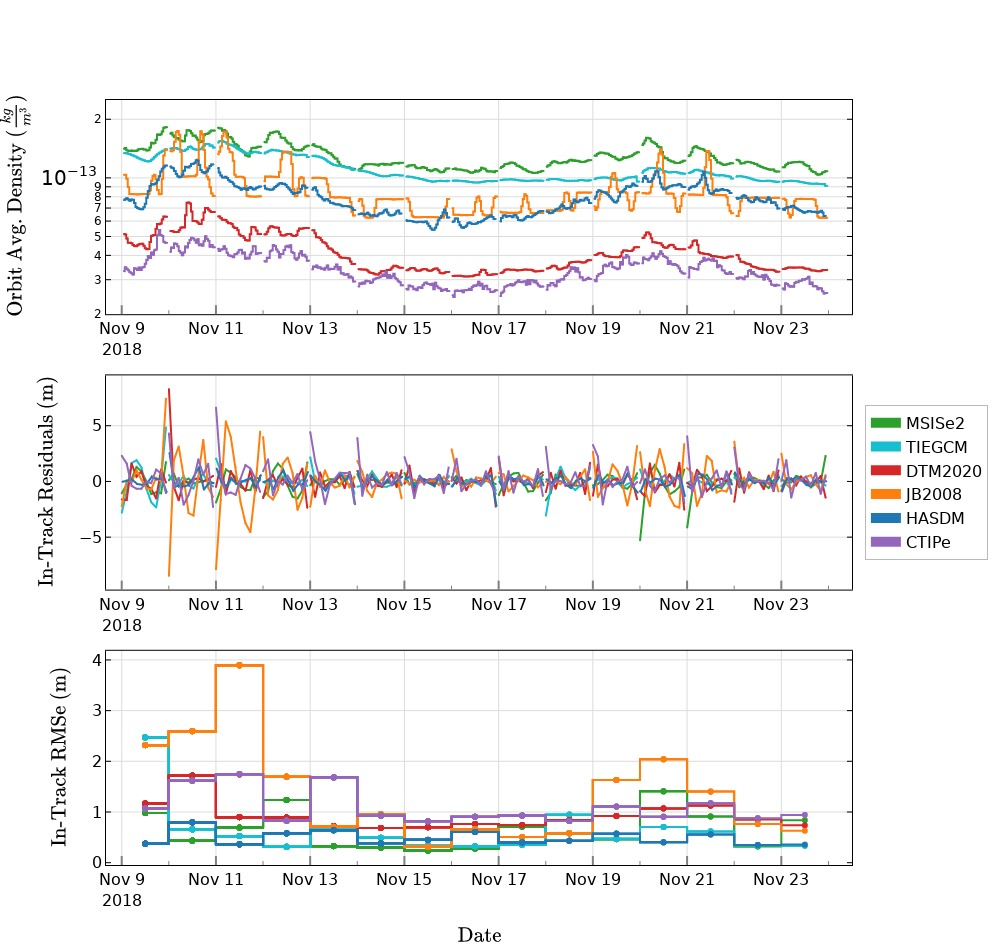

In [17]:


fig = make_subplots(rows=3, cols=1,
#                     subplot_titles=([ ' ', ]),
                    #                     
                    specs=[#[ {"secondary_y": True} ],
                           [ {"secondary_y": False} ],
                           [ {"secondary_y": False} ],
                           [ {"secondary_y": False} ]],
                    #
                    vertical_spacing = 0.08,
                    shared_xaxes=True)




for model in run_dict.keys():
    fig = plot_all_nokp(fig, Obj[model],  run_dict[model], solar_fluxes, arc_listlist)
  
    
#######################################################
font_dict=dict(family='Arial',size=16,color='black')
#######################################################

# fig.update_xaxes(showline=True,
#              showticklabels=True,
#              linecolor='black',
#              linewidth=1,
#              ### Major ticks
#                  ticks='inside',
#                  tickfont=font_dict,
#                  mirror=True,
#                  tickwidth=2,
#                  ticklen=9,
#                  tickcolor='grey',
#                  tick0="2018-11-9" ,
#                  dtick=86400000.0*2,    # milliseconds in a day, every 7 days
#                  #### Minor Ticks
#                  minor=dict(dtick=86400000.0, # milliseconds in a day
#                        tickwidth=1,
#                        ticklen=4,
#                        tickcolor='grey',
#                        ticks='inside'),             
#                  gridcolor='gainsboro',
#                  showgrid=False,
#                  layer='above traces',
#                  tickangle=0,
#                  row=1, col=1)
# fig.update_yaxes(title_text=r"$\text{F}_{\text{10.7}}\text{ Solar Flux (sfu)}$", 
#                  color='cornflowerblue',
#                  range=[64, 86],
#                  showline=True,      # add line at x=0
#                  linecolor='cornflowerblue',  # line color
#                  linewidth=1,        # line size
#                  ticks='inside',     # ticks outside axis
#                  tickfont=dict(family='sans-serif',size=14,color='cornflowerblue'), # tick label font
#                  mirror=False,  # add ticks to top/right axes
#                  tickwidth=1,      # tick width
#                  tickcolor='cornflowerblue',   # tick color
#                  gridcolor='gainsboro',
#                  showgrid=False,
#                  anchor="x", overlaying="y", side="right",
#                  layer='above traces',
#                  secondary_y=True, row=1, col=1,)
# fig.update_yaxes(title_text=r"$\text{K}_\text{p}\text{ Index}$",
#                  secondary_y=False,
#                  showline=True,      # add line at x=0
#                  linecolor='black',  # line color
#                  linewidth=1,        # line size
#                  ticks='inside',     # ticks outside axis
#                  tickfont=dict(family='sans-serif',size=14,color='black'), # tick label font
#                  mirror=False,  # add ticks to top/right axes
#                  tickwidth=1,      # tick width
#                  tickcolor='black',   # tick color
#                  gridcolor='gainsboro',
#                  showgrid=False,
#                  layer='above traces',
#                  row=1, col=1,)
    

for i in [1,2,3]:
    fig.update_xaxes(### LINE at axis border
                      showline=True,
                      showticklabels=True,
                      linecolor='black',
                      linewidth=1,
                     ### Major ticks
                      ticks='inside',
                      tickfont=font_dict,
                      mirror=True,
                      tickwidth=2,
                      ticklen=9,
                      tickcolor='grey',
                      tick0="2018-11-9" ,
                      dtick=86400000.0*2,    # milliseconds in a day, every 7 days
                      #### Minor Ticks
                       minor=dict(
                         dtick=86400000.0, # milliseconds in a day
                         tickwidth=1,
                         ticklen=4,
                         tickcolor='grey',
                         ticks='inside'),
                      ### GRID
                       gridcolor='gainsboro',
                       gridwidth=1,
                       layer='above traces',
                       tickangle=0,
                       row=i, col=1)
    fig.update_yaxes(showline=True,      # add line at x=0
                         showticklabels=True,
                         linecolor='black',  # line color
                         linewidth=1,        # line size
                     ticks='inside',     # ticks outside axis
                     tickfont=font_dict, # tick label font
                     mirror='allticks',  # add ticks to top/right axes
                     tickwidth=1,      # tick width
                     tickcolor='black',  # tick color
                     gridcolor='gainsboro',
                     gridwidth=1,
                     layer='above traces',
                     row=i, col=1)


modelnames=[]
modelcolors = []
#### LEGEND ####
for model in run_dict.keys():
    if model == 'msis2':
        modelnames.append("MSISe2")
        modelcolors.append(col_msis2)

    elif model == 'dtm2020_o':
        modelnames.append("DTM2020")
        modelcolors.append(col_dtm2020)

    elif model == 'jb2008':
        modelnames.append("JB2008")
        modelcolors.append(col_jb2008)

    elif model == 'tiegcm_oc':
        modelnames.append("TIEGCM")
        modelcolors.append(col_tiegcm_oc)

    elif model == 'hasdm_oc':
        modelnames.append("HASDM")
        modelcolors.append(col_hasdm_oc)

    elif model == 'ctipe_oc':
        modelnames.append("CTIPe")
        modelcolors.append(col_ctipe_oc)



df = pd.DataFrame({"starts_colors": modelcolors
                                    })

fig.update_traces(showlegend=False).add_traces(
    [   go.Scattergl(name=modelnames[i], 
               x=[pd.to_datetime( "181107-000000", format='%y%m%d-%H%M%S')],
               mode='lines',
               line = dict(shape = 'hv',  width=10),
               marker_color=c, 
               showlegend=True)
        for i,c in enumerate((df.loc[:,["starts_colors"]].values.ravel()))])

fig.update_layout(legend=dict(
    yanchor="middle",
    y=0.5,
    xanchor="center",
    x=1.1,
#     x=1.015,
        font=font_dict      ,
        bgcolor="white",
        bordercolor="darkgrey",
        borderwidth=0.8,
    )  )

fig.update_layout(
#                   title = '',
                  autosize=False,    width=1000,    height=950,
                  legend= {'itemsizing': 'trace'},
                  font=font_dict,
                  plot_bgcolor='white', 
                 )
fig.update_annotations(font_size=14)  # Increase size of subplot title

fig.show(renderer="jpg",
         config=config)

### pio.write_image(fig, plots_dir+'twoweek_fullresult.pdf')

# pio.write_image(fig, plots_dir+'twoweek_fullresult.jpg', scale=3)

    


### Plot output

## Ratios

In [18]:
# Obj_2weeks['msis2'].__dict__['OrbitResids']['2018.313.01']['data_orbfil'].keys()

In [19]:
# T_ratio

In [20]:
# %load_ext autoreload
# # %autoreload 2


# def plot_ratios(fig, obj_m1, plot_num, solar_fluxes,    arc_listlist ):
    

#     ####  Get plot Parameters for this model
#     model_m1 = obj_m1.__dict__['global_params']['den_model']
#     col,x_annot,y_annot1,y_annot2,m_size = get_plot_params(plot_num, model_m1)
    
#     #### -----------------------------------------------------------------------------------------------------
#     #### Solar Flux Plot
    
# #     index1 = 21+1
# #     index2 = 37+1
# #     index3h_1 = 168+8
# #     index3h_2 = 289+8
    
#     if plot_num == 0:
#         index1 = 21
#         index2 = 37
#         index3h_1 = 168
#         index3h_2 = 289

#         fig.add_trace(go.Scattergl(x=solar_fluxes['date'][index1:index2],
#                                    y=solar_fluxes['f107a_list'][index1:index2],
#                                    name= 'F107a',
#                                    mode='lines',
#                                    opacity=0.8,
#     #                                marker=dict(color='cornflowerblue', size=2 ),
#                                    line = dict(shape = 'hvh', color = 'cornflowerblue', width=1.5),
#                                    showlegend=False),
#                                    secondary_y=True,row=1, col=1)
#         fig.add_trace(go.Scattergl(x=solar_fluxes['date'][index1:index2],
#                                    y=solar_fluxes['f107d_list'][index1:index2],
#                                    name= 'F107d',
#                                    mode='lines',
#                                    opacity=0.5,
#     #                                marker=dict(color='cornflowerblue', size=2 ),
#                                    line = dict(shape = 'hvh', color = 'cornflowerblue', width=1.5),
#                                    showlegend=False),
#                                    secondary_y=True,row=1, col=1)

#         fig.add_trace(go.Scattergl(x=solar_fluxes['date_3hr'][index3h_1:index3h_2],
#                                    y=solar_fluxes['kp_expand'][index3h_1:index3h_2],
#                                    name= 'Kp',
#                                    mode='lines',
#                                    opacity=1,
#     #                                marker=dict(color='black',size=2),
#                                    line = dict(shape = 'hvh', color = 'black', width=2),
#                                    showlegend=False),
#                                    secondary_y=False,row=1, col=1) 
        
#         fig.add_vrect(x0=pd.to_datetime( str(2018312), format='%Y%j'),
#                       x1=pd.to_datetime( str(2018313), format='%Y%j'),
#                       fillcolor='gainsboro',
#                       opacity=.6,
#                       layer="below",
#                       line_width=0,
#                      row=1,col=1)
#         fig.add_vrect(x0=pd.to_datetime( str(2018328), format='%Y%j'),
#                       x1=pd.to_datetime( str(2018338), format='%Y%j'),
#                       fillcolor='gainsboro',
#                       opacity=.6,
#                       layer="below",
#                       line_width=0,
#                      row=1,col=1)


# #     #### Arc Background 
    
    
    
#     for i1,arc1 in enumerate(arc_listlist):#obj_m1.__dict__['global_params']['arc_input']):
#         dateplot = []
#         rms_totals = []
#         T_ratio_means = []

        
#         for ii,arc in enumerate(arc1):#obj_m1.__dict__['global_params']['arc_input']):
#             if arc not in obj_m1.__dict__['global_params']['arc_input']:
#                 continue
#             else:
#                 arc =arc+'.01'

#                 dateplot.append(pd.to_datetime(datetime.datetime(int(arc.split('.')[0]), 1, 1) + datetime.timedelta(int(arc.split('.')[1]))- datetime.timedelta(hours=12) ))
#                 rms_totals.append(obj_m1.__dict__['Statistics'][arc]['T_RMS'].values[0])
                    
                
#                 T_ratio = []
#                 for i,val in enumerate(obj_m1.__dict__['OrbitResids'][arc]['data_orbfil']['Date']):

#                     T_PCE   = obj_m1.__dict__['OrbitResids'][arc]['data_PCE']['T'][i]
#                     T_model = obj_m1.__dict__['OrbitResids'][arc]['data_orbfil']['T'][i]

# #                     print(T_PCE / T_model)
#                     T_ratio.append((T_PCE / T_model) )

#                 T_ratio_means.append((np.mean(T_ratio)))
                
#                 ### -----------------------------------------------------------------------------------------------------
#                 ###     DENSITY
#                 ###
#                 ## Remove the denisty file duplication
#                 vals  = np.arange(obj_m1.__dict__['Density'][arc].index[0],obj_m1.__dict__['Density'][arc].index[-1]+1)
#                 df = obj_m1.__dict__['Density'][arc].set_index('Date',drop=False ) 
#                 df['i_vals'] = vals
#                 index_date = df.loc[df.index.max()]['i_vals'].min()
#                 time_avg,d_avg, d_avg_rolling = orb_avg(obj_m1.Density, arc)

#                 ### -----------------------------------------------------------------------------------------------------
#                 ###     Orbit Averaged Density
#                 fig.add_trace(go.Scattergl(x=time_avg,
#                                            y=d_avg_rolling,
#                                            ### name= model_m1,
#                                            mode='markers+lines',
#                                            opacity=1,
#                                                marker=dict(color=col,size=2),
#                                            ###     line = dict( color = col, width=2),
#                                                line = dict(shape='hvh', dash ='solid', color = col, width=2),
#                                            showlegend=False), row=2, col=1)
#                 ### -----------------------------------------------------------------------------------------------------
#                 ###     In Track Residuals
#                 data_resids = obj_m1.__dict__['OrbitResids'][arc]['resids']
#                 fig.add_trace(go.Scattergl(x=data_resids['Date'][::75],
#                                            y=data_resids['T'][::75],
#                                            ###   name= model_m1,
#                                              mode='markers+lines',
#                                              opacity=1,
#                                                  marker=dict(color=col,size=2),
#                                                  line = dict( color = col, width=2),
#                                              showlegend=False),
#                                              secondary_y=False, row=3, col=1)
#                 ### -----------------------------------------------------------------------------------------------------
#                 ###     RATIO
# #             print()
#             fig.add_trace(go.Scattergl(x=dateplot,
#                                        y=T_ratio_means,
#                                            ###e= 'NTW '+model_m1,
#                                        mode='markers+lines',
#                                              opacity=1,
#                                              marker=dict(color=col,size=6),
#                                            line = dict(shape='hvh', dash ='solid', color = col, width=2),
#                                        showlegend=False),row=4, col=1)


    


    
    
#     if plot_num == 0:
#         ###
#         ### DENSITY AXIS
#         fig.update_yaxes(title_text=r"$\text{Orbit Avg. Density } (\frac{kg}{m^3})$", 
#                          type="log", exponentformat= 'power',row=2, col=1)
#         ###
#         ### InTrack Residual Axis
#         fig.update_yaxes( title=r"$\text{In-Track Residuals (m)}$",
#                          range=[-100,55], exponentformat= 'power',row=3, col=1)
#         ###
#         ### RMS AXIS
#         fig.update_yaxes( title=r"$\text{In-Track Ratio}$" ,type="linear" ,
#                           range=[0.96,1.04], exponentformat= 'power', row=4, col=1)  
#         ###
#         ###  DATE on Final x-Axis only
#         fig.update_xaxes(title=r"$\text{Date}$", 
#                          range=[pd.to_datetime( "181108-160000", format='%y%m%d-%H%M%S'),
#                                 pd.to_datetime( "181124-120000", format='%y%m%d-%H%M%S')],
#                          row=4, col=1)

#     return(fig)

    
    
    
    
#     ### -----------------------------------------------------------------------------------------------------
#     ### -----------------------------------------------------------------------------------------------------
#     ### -----------------------------------------------------------------------------------------------------
#     ### -----------------------------------------------------------------------------------------------------
#     ### -----------------------------------------------------------------------------------------------------




# fig = make_subplots(rows=4, cols=1,
# #                     subplot_titles=([ ' ', ]),
#                     #                     
#                     specs=[[ {"secondary_y": True} ],
#                            [ {"secondary_y": False} ],
#                            [ {"secondary_y": False} ],
#                            [ {"secondary_y": False} ]],
#                     #
#                     vertical_spacing = 0.05,
#                     shared_xaxes=True)


# fig = plot_ratios(fig, Obj_2weeks['msis2'],     0, solar_fluxes, arc_listlist)
# fig = plot_ratios(fig, Obj_2weeks['dtm2020'],   1, solar_fluxes, arc_listlist)
# fig = plot_ratios(fig, Obj_2weeks['jb2008'],    2, solar_fluxes, arc_listlist)
# fig = plot_ratios(fig, Obj_2weeks['hasdm_oc'],  4, solar_fluxes, arc_listlist)

   
    
# #######################################################
# font_dict=dict(family='Arial',size=14,color='black')
# #######################################################

# fig.update_xaxes(showline=True,
#              showticklabels=True,
#              linecolor='black',
#              linewidth=1,
#              ### Major ticks
#                  ticks='inside',
#                  tickfont=font_dict,
#                  mirror=True,
#                  tickwidth=2,
#                  ticklen=9,
#                  tickcolor='grey',
#                  tick0="2018-11-9" ,
#                  dtick=86400000.0*2,    # milliseconds in a day, every 7 days
#                  #### Minor Ticks
#                  minor=dict(dtick=86400000.0, # milliseconds in a day
#                        tickwidth=1,
#                        ticklen=4,
#                        tickcolor='grey',
#                        ticks='inside'),             
#                  gridcolor='gainsboro',
#                  showgrid=False,
#                  layer='above traces',
#                  tickangle=0,
#                  row=1, col=1)
# fig.update_yaxes(title_text=r"$\text{F}_{\text{10.7}}\text{ Solar Flux (sfu)}$", 
#                  color='cornflowerblue',
#                  range=[64, 86],
#                  showline=True,      # add line at x=0
#                  linecolor='cornflowerblue',  # line color
#                  linewidth=1,        # line size
#                  ticks='inside',     # ticks outside axis
#                  tickfont=dict(family='sans-serif',size=14,color='cornflowerblue'), # tick label font
#                  mirror=False,  # add ticks to top/right axes
#                  tickwidth=1,      # tick width
#                  tickcolor='cornflowerblue',   # tick color
#                  gridcolor='gainsboro',
#                  showgrid=False,
#                  anchor="x", overlaying="y", side="right",
#                  layer='above traces',
#                  secondary_y=True, row=1, col=1,)
# fig.update_yaxes(title_text=r"$\text{K}_\text{p}\text{ Index}$",
#                  secondary_y=False,
#                  showline=True,      # add line at x=0
#                  linecolor='black',  # line color
#                  linewidth=1,        # line size
#                  ticks='inside',     # ticks outside axis
#                  tickfont=dict(family='sans-serif',size=14,color='black'), # tick label font
#                  mirror=False,  # add ticks to top/right axes
#                  tickwidth=1,      # tick width
#                  tickcolor='black',   # tick color
#                  gridcolor='gainsboro',
#                  showgrid=False,
#                  layer='above traces',
#                  row=1, col=1,)
    

# for i in [2,3,4]:
#     fig.update_xaxes(### LINE at axis border
#                       showline=True,
#                       showticklabels=True,
#                       linecolor='black',
#                       linewidth=1,
#                      ### Major ticks
#                       ticks='inside',
#                       tickfont=font_dict,
#                       mirror=True,
#                       tickwidth=2,
#                       ticklen=9,
#                       tickcolor='grey',
#                       tick0="2018-11-9" ,
#                       dtick=86400000.0*2,    # milliseconds in a day, every 7 days
#                       #### Minor Ticks
#                        minor=dict(
#                          dtick=86400000.0, # milliseconds in a day
#                          tickwidth=1,
#                          ticklen=4,
#                          tickcolor='grey',
#                          ticks='inside'),
#                       ### GRID
#                        gridcolor='gainsboro',
#                        gridwidth=1,
#                        layer='above traces',
#                        tickangle=0,
#                        row=i, col=1)
#     fig.update_yaxes(showline=True,      # add line at x=0
#                          showticklabels=True,
#                          linecolor='black',  # line color
#                          linewidth=1,        # line size
#                      ticks='inside',     # ticks outside axis
#                      tickfont=font_dict, # tick label font
#                      mirror='allticks',  # add ticks to top/right axes
#                      tickwidth=1,      # tick width
#                      tickcolor='black',  # tick color
#                      gridcolor='gainsboro',
#                      gridwidth=1,
#                      layer='above traces',
#                      row=i, col=1)



# #### LEGEND ####
# modelnames = [  "MSISe2",  "DTM2020",  "JB2008",    "HASDM"]
# df = pd.DataFrame({"starts_colors": [col_msis2, col_dtm2020, col_jb2008, 
#                                       col_hasdm_oc]})

# fig.update_traces(showlegend=False).add_traces(
#     [   go.Scattergl(name=modelnames[i], 
#                x=[pd.to_datetime( "181107-000000", format='%y%m%d-%H%M%S')],
#                mode='lines',
#                line = dict(shape = 'hv',  width=10),
#                marker_color=c, 
#                showlegend=True)
#         for i,c in enumerate((df.loc[:,["starts_colors"]].values.ravel()))])

# fig.update_layout(legend=dict(
#     yanchor="middle",
#     y=0.63,
#     xanchor="center",
#     x=1.05,
# #     x=1.015,
#         font=font_dict      ,
#         bgcolor="white",
#         bordercolor="darkgrey",
#         borderwidth=0.8,
#     )  )

# fig.update_layout(
# #                   title = '',
#                   autosize=False,    width=800,    height=900,
#                   legend= {'itemsizing': 'trace'},
#                   font=font_dict,
#                   plot_bgcolor='white', 
#                  )
# fig.update_annotations(font_size=14)  # Increase size of subplot title

# fig.show( config=config )


# ###### pio.write_image(fig, plots_dir+'twoweek_fullresult.jpg', scale=3)
